<a href="https://colab.research.google.com/github/Veyesd/rh-analysis/blob/cleaning_date/rh_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Basic setup :
---
>

In [5]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
drive

<module 'google.colab.drive' from '/usr/local/lib/python3.10/dist-packages/google/colab/drive.py'>

Loading libraries

In [7]:
import google

import pandas as pd
import numpy as np
import datetime

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import plotly.express as px

# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


First import datas :

In [8]:
df_general = pd.read_csv('/content/drive/MyDrive/projet_Fin/general_data.csv')
df_manager = pd.read_csv('/content/drive/MyDrive/projet_Fin/manager_survey_data.csv')
df_employee = pd.read_csv('/content/drive/MyDrive/projet_Fin/employee_survey_data.csv')
df_in_time = pd.read_csv('/content/drive/MyDrive/projet_Fin/in_time.csv')
df_out_time = pd.read_csv('/content/drive/MyDrive/projet_Fin/out_time.csv')

Documentation :
---
>


- Lein des dataset à exploiter :
https://www.kaggle.com/datasets/vjchoudhary7/hr-analytics-case-study/data
- KPI recommandées en RH :
https://fr.indeed.com/lead/indicateurs-rh-incontournables?gad_source=1&gclid=CjwKCAjw7-SvBhB6EiwAwYdCAQzmq287jpvBBh2naQWtW4BktffZd6rjxx_NzX8MuFJIcyebdS8ZuhoC5_oQAvD_BwE&aceid=


- Salaire en inde en 2015 :
https://web.archive.org/web/20150622015144/http://www.worlddata.info/asia/india/index.php


Les KPI recommandé en RH :

- Mesurer le taux de turn-over
- Déceler le taux d'engagement
- Détecter l'absentéisme
- Miser sur la formation
- Analyser la rémunération

Premiers constats :
---
>

Découvrons les données:

In [9]:
df_general.head(2)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4


In [10]:
df_general.shape

(4410, 24)

In [11]:
df_general.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [12]:
df_general.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.694830,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129
std,9.133301,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.498887,3.659108,0.0,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


In [13]:
# Nan list %
na_list = df_general.isnull().sum() / len(df_general)
na_list

Age                        0.000000
Attrition                  0.000000
BusinessTravel             0.000000
Department                 0.000000
DistanceFromHome           0.000000
Education                  0.000000
EducationField             0.000000
EmployeeCount              0.000000
EmployeeID                 0.000000
Gender                     0.000000
JobLevel                   0.000000
JobRole                    0.000000
MaritalStatus              0.000000
MonthlyIncome              0.000000
NumCompaniesWorked         0.004308
Over18                     0.000000
PercentSalaryHike          0.000000
StandardHours              0.000000
StockOptionLevel           0.000000
TotalWorkingYears          0.002041
TrainingTimesLastYear      0.000000
YearsAtCompany             0.000000
YearsSinceLastPromotion    0.000000
YearsWithCurrManager       0.000000
dtype: float64

On constate déjà qu'on a très peu de données null

In [14]:
df_general['NumCompaniesWorked'].value_counts()

1.0    1558
0.0     586
3.0     474
2.0     438
4.0     415
7.0     222
6.0     208
5.0     187
9.0     156
8.0     147
Name: NumCompaniesWorked, dtype: int64

In [15]:
df_general['Gender'].value_counts()

Male      2646
Female    1764
Name: Gender, dtype: int64

In [16]:
df_general['Over18'].value_counts()

Y    4410
Name: Over18, dtype: int64

In [17]:
df_general['StandardHours'].value_counts()

8    4410
Name: StandardHours, dtype: int64

Nous prenons le partie de supprimer les colonnes:
- Gender car c'est une colonne inutile dans notre contexte et est de plus de discriminante
- Over18 car on constate que tout les employés ont plus de 18 ans, et donc qui est set à 1 partout est donc non révélatrice
- EmployeeCount qui est set à 1 partout est donc non révélatrice
- StandardHours par qu'on constate qu'ils sont tous à 8h théorique et est donc non révélatrice, cependant on conserve cette donnée dans un coin pour plus tard.

In [18]:
df_general = df_general.drop(columns=["Gender","EmployeeCount","Over18","StandardHours"])
df_general

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Healthcare Representative,Married,131160,1.0,11,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,2,1,Research Scientist,Single,41890,0.0,23,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,3,4,Sales Executive,Married,193280,1.0,15,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,4,3,Human Resources,Married,83210,3.0,11,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,5,1,Sales Executive,Single,23420,4.0,12,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,4406,1,Research Scientist,Single,60290,3.0,17,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,4407,1,Laboratory Technician,Divorced,26790,2.0,15,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,4408,2,Sales Executive,Married,37020,0.0,20,0,5.0,4,4,1,2
4408,42,No,Travel_Rarely,Sales,18,2,Medical,4409,1,Laboratory Technician,Divorced,23980,0.0,14,1,10.0,2,9,7,8


In [19]:
df_general['JobLevel'].value_counts()

1    1629
2    1602
3     654
4     318
5     207
Name: JobLevel, dtype: int64

In [20]:
df_general['JobRole'].value_counts()

Sales Executive              978
Research Scientist           876
Laboratory Technician        777
Manufacturing Director       435
Healthcare Representative    393
Manager                      306
Sales Representative         249
Research Director            240
Human Resources              156
Name: JobRole, dtype: int64

In [21]:
df_manager.head(2)

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4


In [22]:
df_manager.shape

(4410, 3)

In [23]:
df_manager.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   EmployeeID         4410 non-null   int64
 1   JobInvolvement     4410 non-null   int64
 2   PerformanceRating  4410 non-null   int64
dtypes: int64(3)
memory usage: 103.5 KB


In [24]:
df_manager.describe()

,EmployeeID,JobInvolvement,PerformanceRating
count,4410.000000,4410.000000,4410.000000
mean,2205.500000,2.729932,3.153741
std,1273.201673,0.711400,0.360742
min,1.000000,1.000000,3.000000
25%,1103.250000,2.000000,3.000000
50%,2205.500000,3.000000,3.000000
75%,3307.750000,3.000000,3.000000
max,4410.000000,4.000000,4.000000


In [25]:
# Nan list %
na_list = df_manager.isnull().sum() / len(df_manager)
na_list

EmployeeID           0.0
JobInvolvement       0.0
PerformanceRating    0.0
dtype: float64

In [26]:
df_employee.head(2)

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0


In [27]:
df_employee.shape

(4410, 4)

In [28]:
df_employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4385 non-null   float64
 2   JobSatisfaction          4390 non-null   float64
 3   WorkLifeBalance          4372 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 137.9 KB


In [29]:
df_employee.describe()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
count,4410.000000,4385.000000,4390.000000,4372.000000
mean,2205.500000,2.723603,2.728246,2.761436
std,1273.201673,1.092756,1.101253,0.706245
min,1.000000,1.000000,1.000000,1.000000
25%,1103.250000,2.000000,2.000000,2.000000
50%,2205.500000,3.000000,3.000000,3.000000
75%,3307.750000,4.000000,4.000000,3.000000
max,4410.000000,4.000000,4.000000,4.000000


In [30]:
# Nan list %
na_list = df_employee.isnull().sum() / len(df_employee)
na_list

EmployeeID                 0.000000
EnvironmentSatisfaction    0.005669
JobSatisfaction            0.004535
WorkLifeBalance            0.008617
dtype: float64

In [31]:
df_in_time = df_in_time.rename(columns={"Unnamed: 0":"EmployeeID"})
df_in_time.head(2)

,EmployeeID,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,...,NaN,2015-12-21 09:55:29,2015-12-22 10:04:06,2015-12-23 10:14:27,2015-12-24 10:11:35,NaN,2015-12-28 10:13:41,2015-12-29 10:03:36,2015-12-30 09:54:12,2015-12-31 10:12:44
1,2,NaN,2015-01-02 10:15:44,2015-01-05 10:21:05,NaN,2015-01-07 09:45:17,2015-01-08 10:09:04,2015-01-09 09:43:26,2015-01-12 10:00:07,2015-01-13 10:43:29,...,2015-12-18 10:37:17,2015-12-21 09:49:02,2015-12-22 10:33:51,2015-12-23 10:12:10,NaN,NaN,2015-12-28 09:31:45,2015-12-29 09:55:49,2015-12-30 10:32:25,2015-12-31 09:27:20


In [32]:
df_in_time.shape

(4410, 262)

In [33]:
df_in_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Columns: 262 entries, EmployeeID to 2015-12-31
dtypes: float64(12), int64(1), object(249)
memory usage: 8.8+ MB


In [34]:
df_in_time.describe()

,EmployeeID,2015-01-01,2015-01-14,2015-01-26,2015-03-05,2015-05-01,2015-07-17,2015-09-17,2015-10-02,2015-11-09,2015-11-10,2015-11-11,2015-12-25
count,4410.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,2205.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1273.201673,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1103.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2205.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,3307.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,4410.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
# Nan list %
na_list = df_in_time.isnull().sum() / len(df_in_time)
na_list

EmployeeID    0.000000
2015-01-01    1.000000
2015-01-02    0.047392
2015-01-05    0.046712
2015-01-06    0.051701
                ...   
2015-12-25    1.000000
2015-12-28    0.053061
2015-12-29    0.052154
2015-12-30    0.060091
2015-12-31    0.048299
Length: 262, dtype: float64

In [36]:
df_out_time = df_out_time.rename(columns={"Unnamed: 0":"EmployeeID"})
df_out_time.head(2)

,EmployeeID,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,...,NaN,2015-12-21 17:15:50,2015-12-22 17:27:51,2015-12-23 16:44:44,2015-12-24 17:47:22,NaN,2015-12-28 18:00:07,2015-12-29 17:22:30,2015-12-30 17:40:56,2015-12-31 17:17:33
1,2,NaN,2015-01-02 18:22:17,2015-01-05 17:48:22,NaN,2015-01-07 17:09:06,2015-01-08 17:34:04,2015-01-09 16:52:29,2015-01-12 17:36:48,2015-01-13 18:00:13,...,2015-12-18 18:31:28,2015-12-21 17:34:16,2015-12-22 18:16:35,2015-12-23 17:38:18,NaN,NaN,2015-12-28 17:08:38,2015-12-29 17:54:46,2015-12-30 18:31:35,2015-12-31 17:40:58


In [37]:
df_out_time.shape

(4410, 262)

In [38]:
df_out_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Columns: 262 entries, EmployeeID to 2015-12-31
dtypes: float64(12), int64(1), object(249)
memory usage: 8.8+ MB


In [39]:
df_out_time.describe()

,EmployeeID,2015-01-01,2015-01-14,2015-01-26,2015-03-05,2015-05-01,2015-07-17,2015-09-17,2015-10-02,2015-11-09,2015-11-10,2015-11-11,2015-12-25
count,4410.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,2205.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1273.201673,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1103.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2205.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,3307.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,4410.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
# Nan list %
na_list = df_out_time.isnull().sum() / len(df_out_time)
na_list

EmployeeID    0.000000
2015-01-01    1.000000
2015-01-02    0.047392
2015-01-05    0.046712
2015-01-06    0.051701
                ...   
2015-12-25    1.000000
2015-12-28    0.053061
2015-12-29    0.052154
2015-12-30    0.060091
2015-12-31    0.048299
Length: 262, dtype: float64

In [41]:
dates_list = list(df_out_time.columns)
dates_list.remove('EmployeeID')
df_dates = pd.DataFrame({"date_date":dates_list})
df_dates

,date_date
0,2015-01-01
1,2015-01-02
2,2015-01-05
3,2015-01-06
4,2015-01-07
...,...
256,2015-12-25
257,2015-12-28
258,2015-12-29
259,2015-12-30


Traitement des dates :
---
>

Génération d'un tableau des présences effective en temps minutes par employé à partir des tables de pointage d'entrée et de sortie :

On se rappel au départ lorsqu'on a regardé les tableaux de date, les chiffres des null dans les deux tableaux de pointage sont les mêmes, on élimine le fait que des personnes puissent avoir oublié de (dé)pointer, et ces jours sont donc forcément des jours d'absentéisme. On remplacera donc les Nan par 0 ensuite.

In [42]:
df_time_calculated = df_in_time
def convert_timedelta(duration):
    days, seconds = duration.days, duration.seconds
    hours = days * 24 + seconds // 3600
    minutes = (seconds % 3600) // 60
    seconds = (seconds % 60)
    return hours, minutes, seconds

for (index1, row1), (index2, row2), (index3, row3) in zip(df_in_time.iterrows(), df_out_time.iterrows(), df_time_calculated.iterrows()):
    for (col_name1, value1), (col_name2, value2), (col_name3, value3) in zip(row1.items(), row2.items(), row3.items()):
        date1 = pd.to_datetime(value1)
        date2 = pd.to_datetime(value2)
        if((col_name1 == 'EmployeeID') & (col_name2 == 'EmployeeID') & (col_name3 == 'EmployeeID')):
          continue
        # if(isinstance(date1, datetime.datetime) == True & isinstance(date2, datetime.datetime) == True):
        result = date2 - date1
        hours, minutes, seconds = convert_timedelta(result)
        df_time_calculated.loc[index3,col_name3] = (hours*60) + minutes

In [43]:
df_time_calculated.fillna(0, inplace=True)
df_time_calculated

,EmployeeID,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,0.0,432,431,444,420,437,449,435,469,...,0,440,443,390,455,0.0,466,438,466,424
1,2,0.0,486,447,0,443,445,429,456,436,...,474,465,462,446,0,0.0,456,478,479,493
2,3,0.0,401,435,384,405,440,411,445,419,...,407,429,408,403,410,0.0,421,446,452,407
3,4,0.0,440,437,416,415,411,431,419,438,...,457,410,439,444,425,0.0,446,445,441,427
4,5,0.0,483,479,460,468,459,463,501,495,...,474,459,477,467,494,0.0,459,496,477,481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4406,0.0,487,530,503,530,493,496,501,525,...,484,489,497,516,515,0.0,508,544,536,510
4406,4407,0.0,375,0,323,343,371,342,363,377,...,355,349,355,366,359,0.0,340,393,342,368
4407,4408,0.0,436,455,458,479,437,421,466,448,...,467,471,465,465,444,0.0,464,0,465,485
4408,4409,0.0,571,575,587,563,552,0,557,575,...,598,560,562,554,581,0.0,603,540,561,576


In [44]:
df_time = df_time_calculated

On supprime les colonnes de jours fériés où personne n'a travaillé pour ne pas les comptabiliser avec les jours effectifs et impacter les résultats inutilement.

In [45]:
for (index1, row1) in df_time.iterrows():
    for (col_name1, value1) in df_time.items():
      if df_time[col_name1].sum() == 0:
        df_time = df_time.drop(columns=[col_name1])
    break

In [46]:
df_time

,EmployeeID,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,...,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,432,431,444,420,437,449,435,469,440,...,0,0,440,443,390,455,466,438,466,424
1,2,486,447,0,443,445,429,456,436,456,...,475,474,465,462,446,0,456,478,479,493
2,3,401,435,384,405,440,411,445,419,446,...,433,407,429,408,403,410,421,446,452,407
3,4,440,437,416,415,411,431,419,438,412,...,447,457,410,439,444,425,446,445,441,427
4,5,483,479,460,468,459,463,501,495,495,...,499,474,459,477,467,494,459,496,477,481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4406,487,530,503,530,493,496,501,525,501,...,510,484,489,497,516,515,508,544,536,510
4406,4407,375,0,323,343,371,342,363,377,360,...,359,355,349,355,366,359,340,393,342,368
4407,4408,436,455,458,479,437,421,466,448,487,...,461,467,471,465,465,444,464,0,465,485
4408,4409,571,575,587,563,552,0,557,575,569,...,555,598,560,562,554,581,603,540,561,576


Calcul du nombre théorique via le nombre de jours ouvré effectifs.

In [47]:
8*262*60

125760

In [48]:
df_time.set_index('EmployeeID')
df_time

,EmployeeID,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,...,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,432,431,444,420,437,449,435,469,440,...,0,0,440,443,390,455,466,438,466,424
1,2,486,447,0,443,445,429,456,436,456,...,475,474,465,462,446,0,456,478,479,493
2,3,401,435,384,405,440,411,445,419,446,...,433,407,429,408,403,410,421,446,452,407
3,4,440,437,416,415,411,431,419,438,412,...,447,457,410,439,444,425,446,445,441,427
4,5,483,479,460,468,459,463,501,495,495,...,499,474,459,477,467,494,459,496,477,481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4406,487,530,503,530,493,496,501,525,501,...,510,484,489,497,516,515,508,544,536,510
4406,4407,375,0,323,343,371,342,363,377,360,...,359,355,349,355,366,359,340,393,342,368
4407,4408,436,455,458,479,437,421,466,448,487,...,461,467,471,465,465,444,464,0,465,485
4408,4409,571,575,587,563,552,0,557,575,569,...,555,598,560,562,554,581,603,540,561,576


Suite d'exploration, jointure, export CSV
---
>

Exportation CSV du tableau de temps formaté détaillé :

In [49]:
df_time.to_csv(r"/content/drive/MyDrive/projet_Fin/df_time_calculated.csv", index=False)

Calcul **Somme** d'heure par date:

In [50]:
total = df_time.applymap(lambda x: x).sum()
total

EmployeeID    9726255
2015-01-02    1938848
2015-01-05    1941262
2015-01-06    1931955
2015-01-07    1940781
               ...   
2015-12-24    1923685
2015-12-28    1929851
2015-12-29    1931546
2015-12-30    1915596
2015-12-31    1938966
Length: 250, dtype: int64

**Somme** par employe

In [51]:
df_time.sum(axis=1, numeric_only=True)

0       102530
1       109189
2       101714
3       101316
4       117578
         ...  
4405    128538
4406     92387
4407    111104
4408    141554
4409    101585
Length: 4410, dtype: int64

**nombre moyen** de **minutes travaillées** / jr

In [52]:
round(df_time.mean(axis=1, numeric_only=True))

0       410.0
1       437.0
2       407.0
3       405.0
4       470.0
        ...  
4405    514.0
4406    370.0
4407    444.0
4408    566.0
4409    406.0
Length: 4410, dtype: float64

calcul de l'**absentéisme**
(compte le nombre de zéro par ligne de dataframe)

In [53]:
(df_time == 0).astype(int).sum(axis=1)

0       17
1       13
2        7
3       14
4        4
        ..
4405     6
4406     8
4407    18
4408     8
4409    17
Length: 4410, dtype: int64

In [54]:
df_time_transposed = df_time.T
df_time_transposed.to_csv(r"/content/drive/MyDrive/projet_Fin/df_time_transposed.csv", index=False)
df_time_transposed

,0,1,2,3,4,5,6,7,8,9,...,4400,4401,4402,4403,4404,4405,4406,4407,4408,4409
EmployeeID,1,2,3,4,5,6,7,8,9,10,...,4401,4402,4403,4404,4405,4406,4407,4408,4409,4410
2015-01-02,432,486,401,440,483,646,410,425,0,441,...,450,465,419,450,410,487,375,436,571,410
2015-01-05,431,447,435,437,479,643,452,423,419,426,...,458,479,434,437,456,530,0,455,575,436
2015-01-06,444,0,384,416,460,657,436,399,439,450,...,454,488,448,430,446,503,323,458,587,403
2015-01-07,420,443,405,415,468,617,385,409,453,429,...,426,499,397,424,420,530,343,479,563,410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-24,455,0,410,425,494,628,414,397,406,439,...,453,483,456,432,454,515,359,444,581,378
2015-12-28,466,456,421,446,459,0,392,377,0,417,...,474,467,412,423,409,508,340,464,603,453
2015-12-29,438,478,446,445,496,653,423,435,425,399,...,443,477,415,461,451,544,393,0,540,431
2015-12-30,466,479,452,441,477,653,423,396,426,435,...,457,450,453,450,448,536,342,465,561,417


on créé un dataframe avec les trois données précédentes pour l'intégrer ensuite au général

In [55]:
df_time_aggregated = pd.concat([df_time.sum(axis=1, numeric_only=True),round(df_time.mean(axis=1, numeric_only=True)),(df_time == 0).astype(int).sum(axis=1)], axis=1, join="inner")
df_time_aggregated = df_time_aggregated.rename(columns={0:"TotalWorkingHours", 1:"AverageHoursPerDay", 2:"NumberOfDaysAbsent"})
df_time_aggregated

,TotalWorkingHours,AverageHoursPerDay,NumberOfDaysAbsent
0,102530,410.0,17
1,109189,437.0,13
2,101714,407.0,7
3,101316,405.0,14
4,117578,470.0,4
...,...,...,...
4405,128538,514.0,6
4406,92387,370.0,8
4407,111104,444.0,18
4408,141554,566.0,8


On Concat le tout pour avoir un tableau global à partir duquel on va pouvoir commencer à trouver des corrélations.

In [56]:
df_global = pd.concat([df_general, df_time_aggregated], axis=1, join="inner")
df_global.to_csv(r"/content/drive/MyDrive/projet_Fin/df_global.csv", index=False)
df_all = pd.concat([df_global, df_manager[['JobInvolvement','PerformanceRating']], df_employee[['EnvironmentSatisfaction','JobSatisfaction','WorkLifeBalance']]], axis=1, join="inner")
df_all.to_csv(r"/content/drive/MyDrive/projet_Fin/df_all.csv", index=False)
df_all_copy = df_all
df_all

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,JobLevel,JobRole,...,YearsSinceLastPromotion,YearsWithCurrManager,TotalWorkingHours,AverageHoursPerDay,NumberOfDaysAbsent,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Healthcare Representative,...,0,0,102530,410.0,17,3,3,3.0,4.0,2.0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,2,1,Research Scientist,...,1,4,109189,437.0,13,2,4,3.0,2.0,4.0
2,32,No,Travel_Frequently,Research & Development,17,4,Other,3,4,Sales Executive,...,0,3,101714,407.0,7,3,3,2.0,2.0,1.0
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,4,3,Human Resources,...,7,5,101316,405.0,14,2,3,4.0,4.0,3.0
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,5,1,Sales Executive,...,0,4,117578,470.0,4,3,3,4.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,4406,1,Research Scientist,...,0,2,128538,514.0,6,3,3,4.0,1.0,3.0
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,4407,1,Laboratory Technician,...,0,2,92387,370.0,8,2,3,4.0,4.0,3.0
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,4408,2,Sales Executive,...,1,2,111104,444.0,18,3,4,1.0,3.0,3.0
4408,42,No,Travel_Rarely,Sales,18,2,Medical,4409,1,Laboratory Technician,...,7,8,141554,566.0,8,2,3,4.0,1.0,3.0


Calcul du turnover => taux d'attrition
---
>

In [57]:
df_all[df_global['Attrition'] == 'Yes'].shape[0] / df_all['Attrition'].shape[0]

0.16122448979591836

Première visualisation de correlation :
---
>

<Axes: >

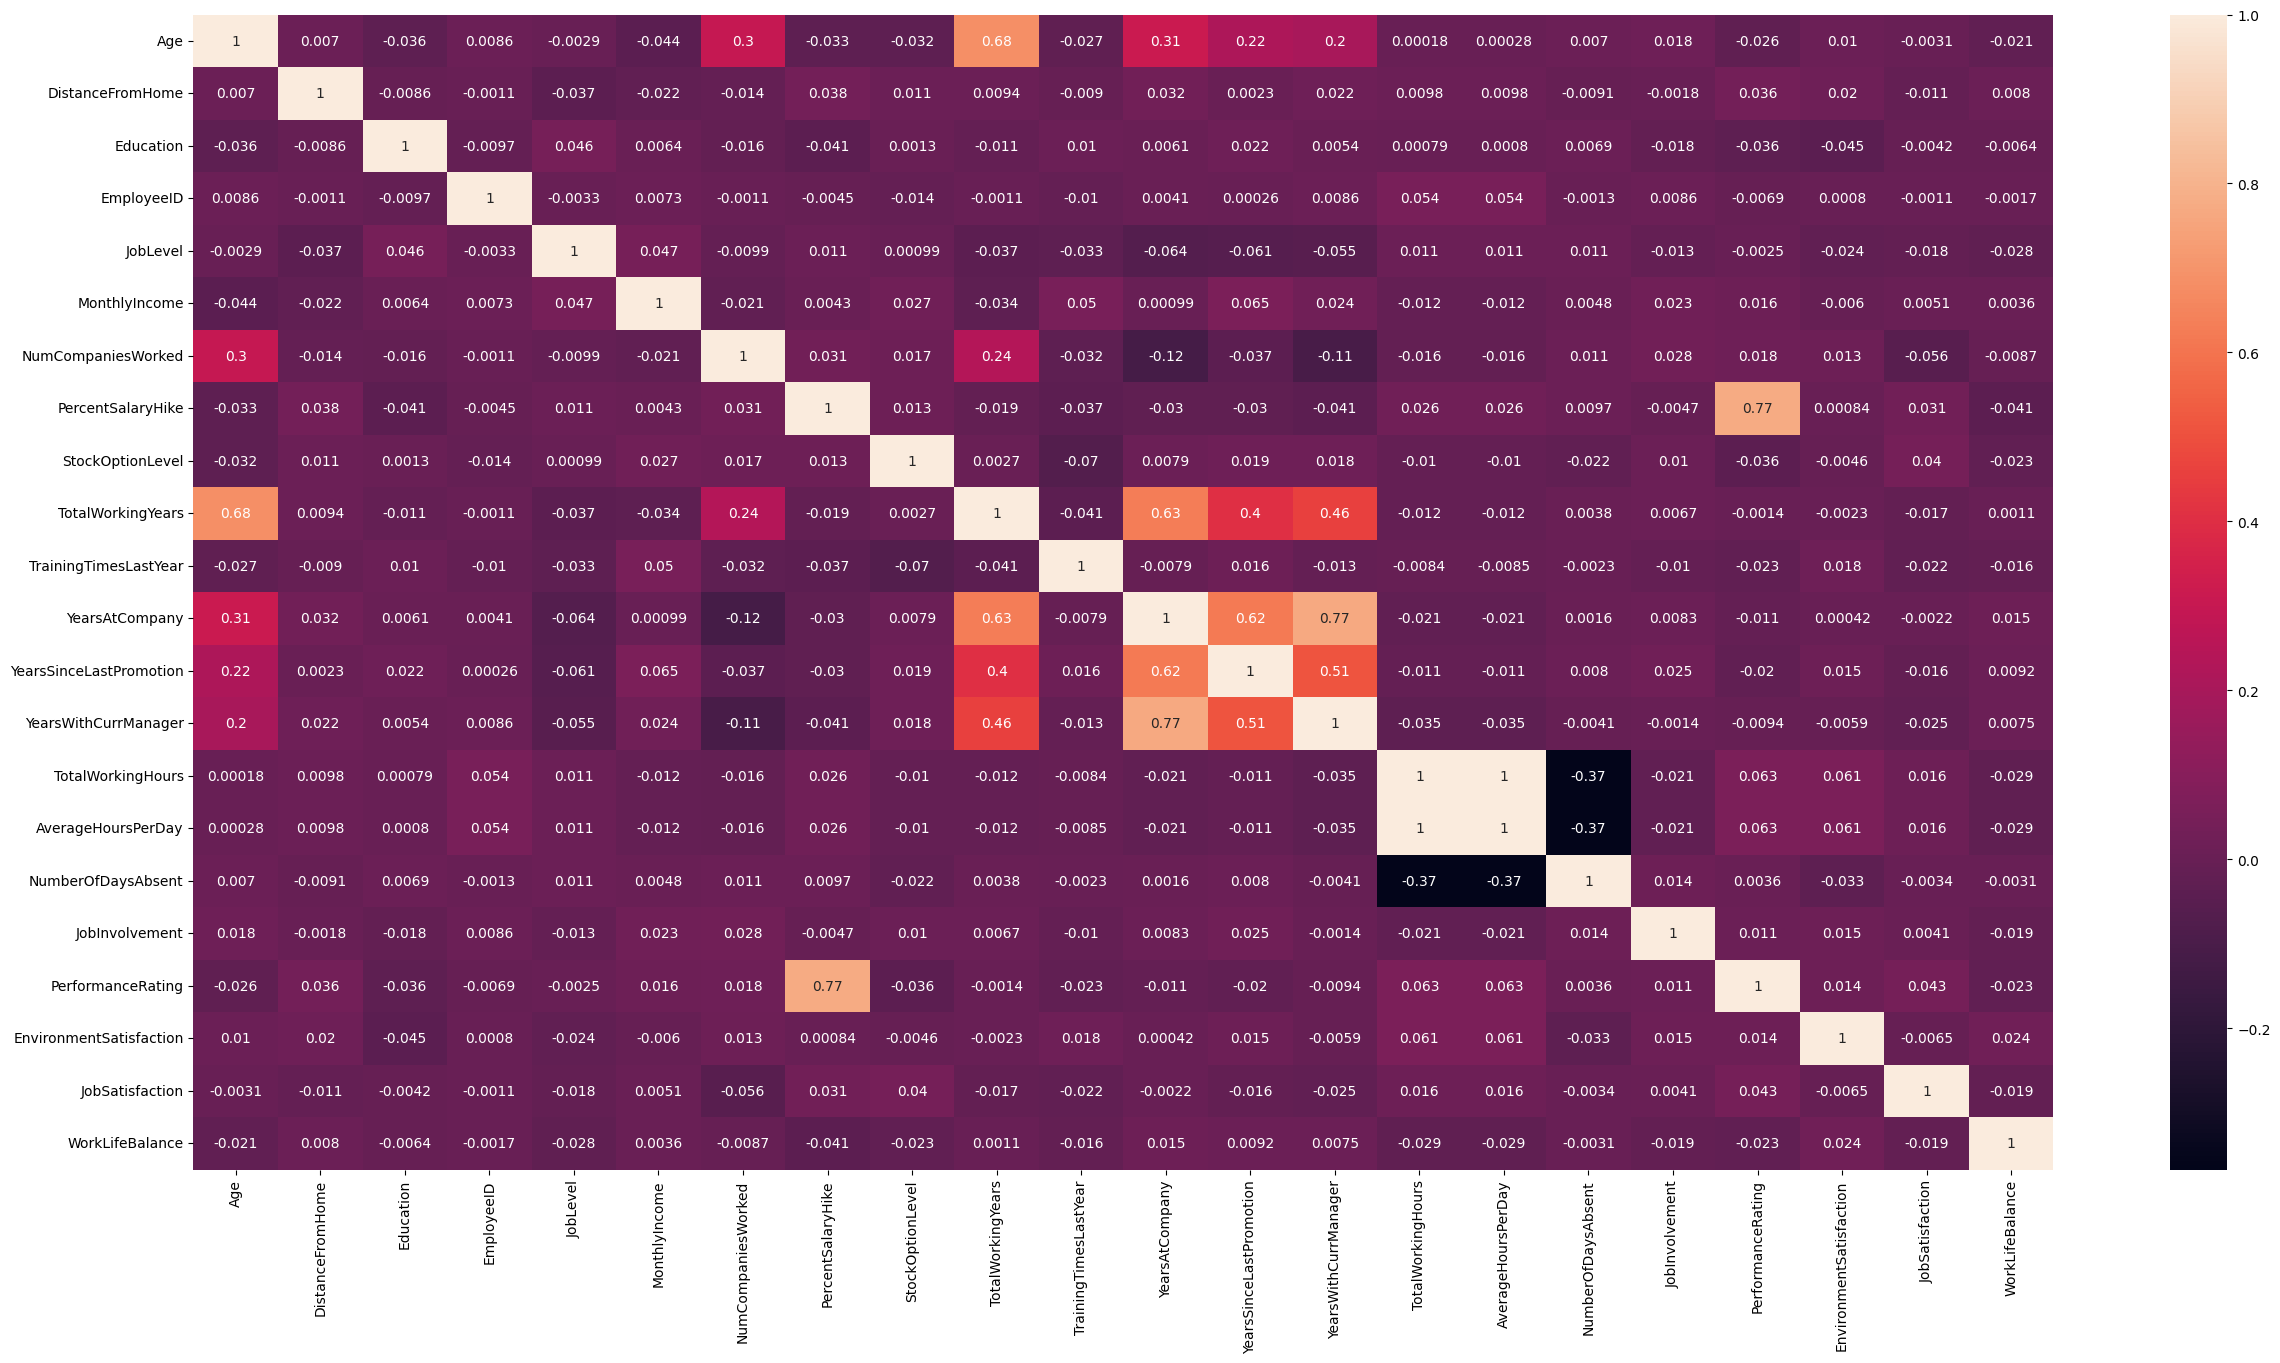

In [58]:
# Correlation matrix
numerical_features = df_all.select_dtypes(include=np.number)
numerical_features
numerical_features.corr()
plt.figure(figsize=(30,15))
sns.heatmap(numerical_features.corr(),annot=True)

A première vu, on peut étudier les correlation entre:

- PercentSalaryHike & PerformanceRating *

- YearWithCurrentManager & TotalWorkingYears
- YearWithCurrentManager & YearsAtCompagny *
- YearWithCurrentManager & YearsSinceLastPromotion

Ne sont pas corrélées :
- Absenteisme & TotalWorkingHours
- Absenteisme & AverageHoursPerDay

Suite ⁉
---
>

- Déceler le taux d'engagement
- Détecter l'absentéisme
- Analyser la rémunération

In [59]:
df_all.groupby('Department').sum()

<ipython-input-59-9428e88825d6>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_all.groupby('Department').sum()


,Age,DistanceFromHome,Education,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,...,YearsSinceLastPromotion,YearsWithCurrManager,TotalWorkingHours,AverageHoursPerDay,NumberOfDaysAbsent,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
Department,,,,,,,,,,,,,,,,,,,,,
Human Resources,6921,1560,564,441054,429,10943940,383.0,2790,159,1895.0,...,318,615,21216670,84872.0,2362,519,594,534.0,507.0,513.0
Research & Development,106797,26628,8382,6320262,5865,193702890,8007.0,44085,2250,33262.0,...,6387,12066,322226598,1288924.0,36588,7854,9117,7782.0,7769.0,7866.0
Sales,49116,12351,3900,2964939,2808,82132440,3443.0,20199,1092,14486.0,...,2943,5502,147680750,590731.0,17210,3666,4197,3627.0,3701.0,3694.0


In [60]:
df_attrition_yes = df_all[df_all['Attrition'] == 'Yes']
df_attrition_yes

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,JobLevel,JobRole,...,YearsSinceLastPromotion,YearsWithCurrManager,TotalWorkingHours,AverageHoursPerDay,NumberOfDaysAbsent,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,2,1,Research Scientist,...,1,4,109189,437.0,13,2,4,3.0,2.0,4.0
6,28,Yes,Travel_Rarely,Research & Development,11,2,Medical,7,2,Sales Executive,...,0,0,96266,385.0,17,3,4,1.0,3.0,1.0
13,47,Yes,Non-Travel,Research & Development,1,1,Medical,14,1,Research Scientist,...,9,9,132434,530.0,14,2,3,1.0,2.0,2.0
28,44,Yes,Travel_Frequently,Research & Development,1,2,Medical,29,2,Research Scientist,...,0,0,159957,640.0,6,2,3,4.0,3.0,1.0
30,26,Yes,Travel_Rarely,Research & Development,4,3,Medical,31,3,Research Scientist,...,0,2,144276,577.0,11,2,3,1.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4381,29,Yes,Travel_Rarely,Research & Development,7,1,Life Sciences,4382,1,Research Scientist,...,0,1,124816,499.0,10,3,4,3.0,4.0,2.0
4386,33,Yes,Travel_Rarely,Sales,11,4,Marketing,4387,1,Research Scientist,...,0,4,156869,627.0,16,2,4,3.0,4.0,1.0
4388,33,Yes,Travel_Rarely,Sales,1,3,Life Sciences,4389,2,Manager,...,1,7,102223,409.0,19,3,3,1.0,1.0,4.0
4391,32,Yes,Travel_Rarely,Sales,23,1,Life Sciences,4392,3,Healthcare Representative,...,1,2,150820,603.0,9,3,3,4.0,3.0,1.0


In [61]:
df_attrition_no = df_all[df_all['Attrition'] == 'No']
df_attrition_no

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,JobLevel,JobRole,...,YearsSinceLastPromotion,YearsWithCurrManager,TotalWorkingHours,AverageHoursPerDay,NumberOfDaysAbsent,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Healthcare Representative,...,0,0,102530,410.0,17,3,3,3.0,4.0,2.0
2,32,No,Travel_Frequently,Research & Development,17,4,Other,3,4,Sales Executive,...,0,3,101714,407.0,7,3,3,2.0,2.0,1.0
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,4,3,Human Resources,...,7,5,101316,405.0,14,2,3,4.0,4.0,3.0
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,5,1,Sales Executive,...,0,4,117578,470.0,4,3,3,4.0,1.0,3.0
5,46,No,Travel_Rarely,Research & Development,8,3,Life Sciences,6,4,Research Director,...,7,7,153412,614.0,12,3,3,3.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,4406,1,Research Scientist,...,0,2,128538,514.0,6,3,3,4.0,1.0,3.0
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,4407,1,Laboratory Technician,...,0,2,92387,370.0,8,2,3,4.0,4.0,3.0
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,4408,2,Sales Executive,...,1,2,111104,444.0,18,3,4,1.0,3.0,3.0
4408,42,No,Travel_Rarely,Sales,18,2,Medical,4409,1,Laboratory Technician,...,7,8,141554,566.0,8,2,3,4.0,1.0,3.0


In [62]:
px.histogram(df_global[df_global['Attrition'] == 'No'], x="Department", y="TotalWorkingHours")

In [63]:
px.histogram(df_global[df_global['Attrition'] == 'Yes'], x="Department", y="TotalWorkingHours")

In [64]:
px.histogram(df_global, x="Department", y="TotalWorkingHours")

En regardant les datas, on remarque que l'attrition et les heures globalement effectué par le service RH sont relativement négligeable.

In [65]:
df_all

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,JobLevel,JobRole,...,YearsSinceLastPromotion,YearsWithCurrManager,TotalWorkingHours,AverageHoursPerDay,NumberOfDaysAbsent,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Healthcare Representative,...,0,0,102530,410.0,17,3,3,3.0,4.0,2.0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,2,1,Research Scientist,...,1,4,109189,437.0,13,2,4,3.0,2.0,4.0
2,32,No,Travel_Frequently,Research & Development,17,4,Other,3,4,Sales Executive,...,0,3,101714,407.0,7,3,3,2.0,2.0,1.0
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,4,3,Human Resources,...,7,5,101316,405.0,14,2,3,4.0,4.0,3.0
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,5,1,Sales Executive,...,0,4,117578,470.0,4,3,3,4.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,4406,1,Research Scientist,...,0,2,128538,514.0,6,3,3,4.0,1.0,3.0
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,4407,1,Laboratory Technician,...,0,2,92387,370.0,8,2,3,4.0,4.0,3.0
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,4408,2,Sales Executive,...,1,2,111104,444.0,18,3,4,1.0,3.0,3.0
4408,42,No,Travel_Rarely,Sales,18,2,Medical,4409,1,Laboratory Technician,...,7,8,141554,566.0,8,2,3,4.0,1.0,3.0


In [66]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeID               4410 non-null   int64  
 8   JobLevel                 4410 non-null   int64  
 9   JobRole                  4410 non-null   object 
 10  MaritalStatus            4410 non-null   object 
 11  MonthlyIncome            4410 non-null   int64  
 12  NumCompaniesWorked       4391 non-null   float64
 13  PercentSalaryHike        4410 non-null   int64  
 14  StockOptionLevel        

In [67]:
df_all.describe()

,Age,DistanceFromHome,Education,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,...,YearsSinceLastPromotion,YearsWithCurrManager,TotalWorkingHours,AverageHoursPerDay,NumberOfDaysAbsent,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
count,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.000000,4401.000000,...,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4385.000000,4390.000000,4372.000000
mean,36.923810,9.192517,2.912925,2205.500000,2.063946,65029.312925,2.694830,15.209524,0.793878,11.279936,...,2.187755,4.123129,111365.990476,445.470975,12.734694,2.729932,3.153741,2.723603,2.728246,2.761436
std,9.133301,8.105026,1.023933,1273.201673,1.106689,47068.888559,2.498887,3.659108,0.851883,7.782222,...,3.221699,3.567327,19908.354589,79.636255,5.503779,0.711400,0.360742,1.092756,1.101253,0.706245
min,18.000000,1.000000,1.000000,1.000000,1.000000,10090.000000,0.000000,11.000000,0.000000,0.000000,...,0.000000,0.000000,81730.000000,327.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000
25%,30.000000,2.000000,2.000000,1103.250000,1.000000,29110.000000,1.000000,12.000000,0.000000,6.000000,...,0.000000,2.000000,95913.250000,384.000000,8.000000,2.000000,3.000000,2.000000,2.000000,2.000000
50%,36.000000,7.000000,3.000000,2205.500000,2.000000,49190.000000,2.000000,14.000000,1.000000,10.000000,...,1.000000,3.000000,106904.000000,428.000000,13.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,43.000000,14.000000,4.000000,3307.750000,3.000000,83800.000000,4.000000,18.000000,1.000000,15.000000,...,3.000000,7.000000,120539.750000,482.000000,17.000000,3.000000,3.000000,4.000000,4.000000,3.000000
max,60.000000,29.000000,5.000000,4410.000000,5.000000,199990.000000,9.000000,25.000000,3.000000,40.000000,...,15.000000,17.000000,166708.000000,667.000000,24.000000,4.000000,4.000000,4.000000,4.000000,4.000000
